In [1]:
!pip install pandas


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 4.1 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("small_ecommerce.csv")


In [4]:
data.keys()


Index(['_id', 'datetime_extracted', 'description', 'ecommerce',
       'extras.breadcrumb', 'extras.category', 'extras.sellerName', 'image',
       'name', 'price', 'url'],
      dtype='object')

In [5]:
data_truncated = data.drop(columns=["datetime_extracted", "ecommerce", "extras.breadcrumb", "extras.sellerName", "image", "price", "url", "_id"])


In [6]:
data_truncated


,description,extras.category,name
0,"[""Boosts Immunity & Metabolism"",""Anti-Ageing P...",Dry & Packaged Food,Desi Grub Raw White Honey | Unpasteurized Unfi...
1,"[""Improves Hearth Health"",""Moisturizes dry/tri...",Dry & Packaged Food,Desi Grub Apricot Kernel Oil Extra Virgin - 10...
2,"[""TOP CLASS QUALITY - Our towels are made of r...",Hygiene & Cleaning Essentials,12 Pcs Kitchen Dish Towels Super Absorbent Ki...
3,"[""TOP CLASS QUALITY - Our towels are made of r...",Hygiene & Cleaning Essentials,6 Pcs Kitchen Dish Towels Super Absorbent Kit...
4,"[""【LINT-FREE, SCRATCH-FREE, SWIRL-FREE, 】Car W...",Hygiene & Cleaning Essentials,Multicolor Waterproof Free Size Microfiber Han...
...,...,...,...
12052,[],NaN,Air Wick Nagpur Narangi L&O Refill 250ml
12053,"[""Daily Protection: Dettol Bathing soap bar pr...",NaN,Dettol Soap Original 125gm
12054,[],NaN,Tokla Tea 50 Bags 100Gm
12055,"[""India's No.1 Floor Cleaning Brand. Recommend...",NaN,LIzol Floral 500ml


In [7]:
categories = data_truncated["extras.category"].value_counts(dropna=False)
categories

NaN                     4602
Toys & Games             406
Books                    300
Clothing                 214
Utensils                 207
                        ... 
Anthology                  1
Satire                     1
Men’s undergarments        1
Garment Steamers           1
Samsung Mobile             1
Name: extras.category, Length: 298, dtype: int64

In [8]:
len(categories)


298

In [9]:
categories.describe()


count     298.000000
mean       40.459732
std       269.153493
min         1.000000
25%         3.000000
50%         8.000000
75%        28.750000
max      4602.000000
Name: extras.category, dtype: float64

In [10]:
categories = categories.to_frame()


In [11]:
categories.columns= ["Count"]


In [12]:
categories = categories.query("Count > 8")


In [13]:
categories

,Count
NaN,4602
Toys & Games,406
Books,300
Clothing,214
Utensils,207
...,...
"Religion, spirituality, and new age",10
Purifier,9
Heating & Cooling,9
Health,9


In [14]:
category_names = list(categories.index)
category_names


[nan,
 'Toys & Games',
 'Books',
 'Clothing ',
 'Utensils',
 'Headphone & Headset ',
 'Cooking Essentials ',
 'Furnishing & Decor',
 'Skin care',
 "Children's",
 'Dry & Packaged Food ',
 'Whiskey',
 'Refrigerator ',
 'Electronic Accessories ',
 'Women Fashion',
 'Fitness & Sports',
 'Kids Clothing',
 'Covid-19 Safety Gears',
 'Make-up ',
 'Wine',
 "Men's Clothing ",
 'Fiction',
 'Non-Fiction',
 'Home and Lifestyle',
 'Bottle Feeding',
 ' Footwear',
 'Beer',
 'Australian Wines',
 'Portable Speakers',
 'air conditioner',
 'Birthday',
 'Fruits & Vegetables ',
 'Kitchenware & Dinning',
 'Vodka',
 'French Wines',
 'Chilean Wines',
 'Baby Health & Hygiene',
 'Self help',
 'Fans',
 'Bags & luggage',
 'Hair Care ',
 'Beauty & Health ',
 'Covid ',
 'Smart Speakers ',
 'Pressure Cooker',
 'Smart Watches',
 'Bottle',
 'Wireless & Car Chargers ',
 'Grinder',
 'Pet Food ',
 'Washing Machine',
 'Fragrance',
 'Mens Grooming ',
 'Two Wheelers',
 'Organic Products',
 'Beverages ',
 'Bathing & Gromming 

In [15]:
data_truncated = data_truncated.rename(columns = {"extras.category": "category"})

In [16]:
data_truncated = data_truncated.dropna()


In [17]:
queryset = [f'category.str.startswith("{name}")' for name in category_names]
filtered_data = data_truncated.query(" | ".join(queryset), engine="python")


In [19]:
filtered_data

,description,category,name
0,"[""Boosts Immunity & Metabolism"",""Anti-Ageing P...",Dry & Packaged Food,Desi Grub Raw White Honey | Unpasteurized Unfi...
1,"[""Improves Hearth Health"",""Moisturizes dry/tri...",Dry & Packaged Food,Desi Grub Apricot Kernel Oil Extra Virgin - 10...
2,"[""TOP CLASS QUALITY - Our towels are made of r...",Hygiene & Cleaning Essentials,12 Pcs Kitchen Dish Towels Super Absorbent Ki...
3,"[""TOP CLASS QUALITY - Our towels are made of r...",Hygiene & Cleaning Essentials,6 Pcs Kitchen Dish Towels Super Absorbent Kit...
4,"[""【LINT-FREE, SCRATCH-FREE, SWIRL-FREE, 】Car W...",Hygiene & Cleaning Essentials,Multicolor Waterproof Free Size Microfiber Han...
...,...,...,...
7449,[],air conditioner,Tesla TE-12KHC-NAA-BLG WALL MOUNT AC
7450,[],air conditioner,Tesla TE-09KHC-NAA-BLG WALL MOUNT (NON INVERTE...
7451,"[""Brand: Rowa"",""Model No:RSC-285ESS,"",""Capacit...",Freezers,Rowa RSC-285ESS UPRIGHT SHOWCASE
7453,"[""Induction Laddle Set - 6 Pieces "",""Stand not...",Utensils,Induction Ladle Set (6 Pieces)


In [20]:
filtered_data["description"] = filtered_data["description"].str.replace("[", "")
filtered_data["description"] = filtered_data["description"].str.replace("]", "")
filtered_data["description"] = filtered_data["description"].str.replace('"', "")


/tmp/ipykernel_195597/199039559.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_data["description"] = filtered_data["description"].str.replace("[", "")
/tmp/ipykernel_195597/199039559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["description"] = filtered_data["description"].str.replace("[", "")
/tmp/ipykernel_195597/199039559.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_data["description

In [21]:
filtered_data


,description,category,name
0,"Boosts Immunity & Metabolism,Anti-Ageing Prope...",Dry & Packaged Food,Desi Grub Raw White Honey | Unpasteurized Unfi...
1,"Improves Hearth Health,Moisturizes dry/tried s...",Dry & Packaged Food,Desi Grub Apricot Kernel Oil Extra Virgin - 10...
2,TOP CLASS QUALITY - Our towels are made of ren...,Hygiene & Cleaning Essentials,12 Pcs Kitchen Dish Towels Super Absorbent Ki...
3,TOP CLASS QUALITY - Our towels are made of ren...,Hygiene & Cleaning Essentials,6 Pcs Kitchen Dish Towels Super Absorbent Kit...
4,"【LINT-FREE, SCRATCH-FREE, SWIRL-FREE, 】Car Was...",Hygiene & Cleaning Essentials,Multicolor Waterproof Free Size Microfiber Han...
...,...,...,...
7449,,air conditioner,Tesla TE-12KHC-NAA-BLG WALL MOUNT AC
7450,,air conditioner,Tesla TE-09KHC-NAA-BLG WALL MOUNT (NON INVERTE...
7451,"Brand: Rowa,Model No:RSC-285ESS,,Capacity:285 ...",Freezers,Rowa RSC-285ESS UPRIGHT SHOWCASE
7453,"Induction Laddle Set - 6 Pieces ,Stand not inc...",Utensils,Induction Ladle Set (6 Pieces)


In [24]:
!pip install -U scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.1,
    min_df=5,
    stop_words="english",
)
X_tfidf = vectorizer.fit_transform(filtered_data.description)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 7.1 MB/s eta 0:00:0000:0100:01


In [25]:
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")


n_samples: 6979, n_features: 6001


In [26]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")


0.004


In [27]:
from sklearn.cluster import KMeans
for seed in range(5):
    kmeans = KMeans(
        n_clusters=50,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()

Number of elements asigned to each cluster: [  21  161 4867   22   38    1    8   12   14    6   71    4   70    2
    3    4    9   70    3   34   56   21   35  135    7  111   28   56
   22   35    7   21    6    8    5   21   80  457    4    9  218   42
    7    4   15   96    9   33    8    3]
Number of elements asigned to each cluster: [  17 5289   73    2    4   45   12  310    2   14   56    9   14  116
   22   11   54   15  182    5    8  190   10   19   21    3    6    8
   12   11    2    4    5    5    9   34    5   32   10    7    9    2
    2  226    7   32    7   26    5   10]
Number of elements asigned to each cluster: [   8 5354    3   12   26   54   35  285   11   57   25   60  182    4
    3   61    8   31   42    3    2    6   10   71   12    8   56   11
    2   47    2   22    2    2    4    6  115   45    2    5    2    5
    1   14    4    4    6   21    9  219]
Number of elements asigned to each cluster: [   1   14    1   28   42   93  158  129    2  115    3    

In [28]:
from collections import defaultdict
from sklearn import metrics
from time import time

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)



In [29]:
kmeans = KMeans(
    n_clusters=50,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")


clustering done in 4.90 ± 1.45 s 
Silhouette Coefficient: 0.050 ± 0.003


In [30]:
filtered_data["cluster"] = kmeans.labels_


/tmp/ipykernel_195597/3813452935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["cluster"] = kmeans.labels_


In [31]:
filtered_data.query("cluster == 4")


,description,category,name,cluster
0,"Boosts Immunity & Metabolism,Anti-Ageing Prope...",Dry & Packaged Food,Desi Grub Raw White Honey | Unpasteurized Unfi...,4
1,"Improves Hearth Health,Moisturizes dry/tried s...",Dry & Packaged Food,Desi Grub Apricot Kernel Oil Extra Virgin - 10...,4
2,TOP CLASS QUALITY - Our towels are made of ren...,Hygiene & Cleaning Essentials,12 Pcs Kitchen Dish Towels Super Absorbent Ki...,4
3,TOP CLASS QUALITY - Our towels are made of ren...,Hygiene & Cleaning Essentials,6 Pcs Kitchen Dish Towels Super Absorbent Kit...,4
4,"【LINT-FREE, SCRATCH-FREE, SWIRL-FREE, 】Car Was...",Hygiene & Cleaning Essentials,Multicolor Waterproof Free Size Microfiber Han...,4
...,...,...,...,...
7448,"Anti Cold Air Functions,2 Way Cleaning,Remote ...",air conditioner,Tesla Ceiling Cassette 4 Ton Air Conditioner T...,4
7449,,air conditioner,Tesla TE-12KHC-NAA-BLG WALL MOUNT AC,4
7450,,air conditioner,Tesla TE-09KHC-NAA-BLG WALL MOUNT (NON INVERTE...,4
7453,"Induction Laddle Set - 6 Pieces ,Stand not inc...",Utensils,Induction Ladle Set (6 Pieces),4


In [33]:
labels, counts = np.unique(kmeans.labels_, return_counts = True)
counts[4] = 0


In [34]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [36]:
counts

array([  2,   1,   1, 208,   0,  45,  15,   6,  43,   8,  38,  20,  34,
        54,  98,  32,  60,   9,  42,  52,   9, 190,   8,   5,  80,   6,
         3,  11,  10,  10,   8,  22,  11,  12, 166,   4,   6,  19,  35,
        84, 140,  24, 263, 458,   3,  31,   4,  10,   4,   4])

In [38]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 8.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00ta 0:00:01
  Using cached Pillow-9.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)


<Axes: >

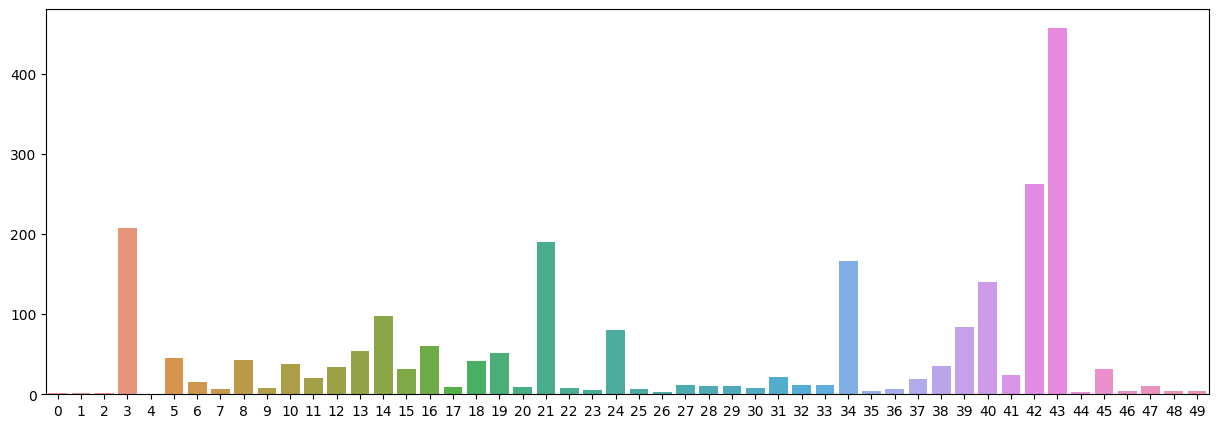

In [39]:
fig, axes=plt.subplots(1, 1, sharex=True, figsize=(15,5)) 
sns.barplot(x = labels, y = counts, ax = axes) 

In [40]:
filtered_data.query("cluster == 3")["category"].value_counts()

Wine                   75
Australian Wines       40
Chilean Wines          39
French Wines           31
Champagne               9
Domestic Wine           6
Whiskey                 2
Cooking Essentials      1
G-bar                   1
Furnishing & Decor      1
Liqueurs                1
Refrigerator            1
Utensils                1
Name: category, dtype: int64

In [41]:
dominant_clusters = filtered_data.cluster.value_counts()[:20].keys()

In [42]:
for cluster in dominant_clusters:
    print("-".join(["" for a in range(30)]))
    print(f"Cluster: {cluster}")
    print (filtered_data.query(f"cluster == {cluster}")["category"].value_counts())

-----------------------------
Cluster: 4
Books                           263
Skin care                       169
Dry & Packaged Food             166
Whiskey                         160
Cooking Essentials              137
                               ... 
Jewellery & Accessories           2
Live Sound & Stage Equipment      2
Audio                             2
Wine Cellars                      2
Health                            1
Name: category, Length: 147, dtype: int64
-----------------------------
Cluster: 43
Headphone & Headset              153
Electronic Accessories            55
Portable Speakers                 51
Smart Speakers                    37
Wireless & Car Chargers           27
Television                        22
Smart Watches                     21
Mobile & Tablet Accessories       18
Audio                             14
Live Sound & Stage Equipment       8
Stands & Holders                   7
Other Accessories                  7
Two Wheelers                       

For n_clusters = 2 The average silhouette_score is : 0.023240222669810066
For n_clusters = 4 The average silhouette_score is : 0.02637091008942588
For n_clusters = 6 The average silhouette_score is : 0.02032878870253208
For n_clusters = 8 The average silhouette_score is : 0.03002938037357207
For n_clusters = 10 The average silhouette_score is : 0.012785390000301574
For n_clusters = 15 The average silhouette_score is : 0.019162202175730062
For n_clusters = 20 The average silhouette_score is : 0.04644080306825636


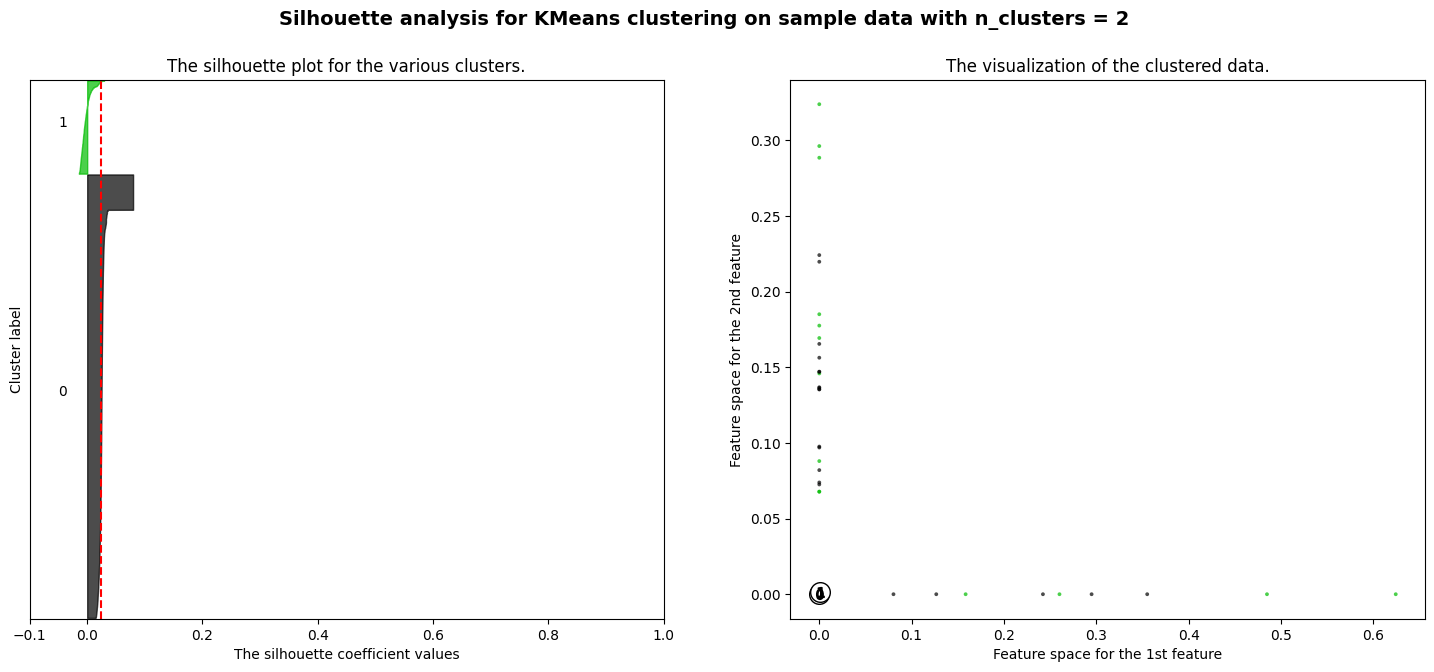

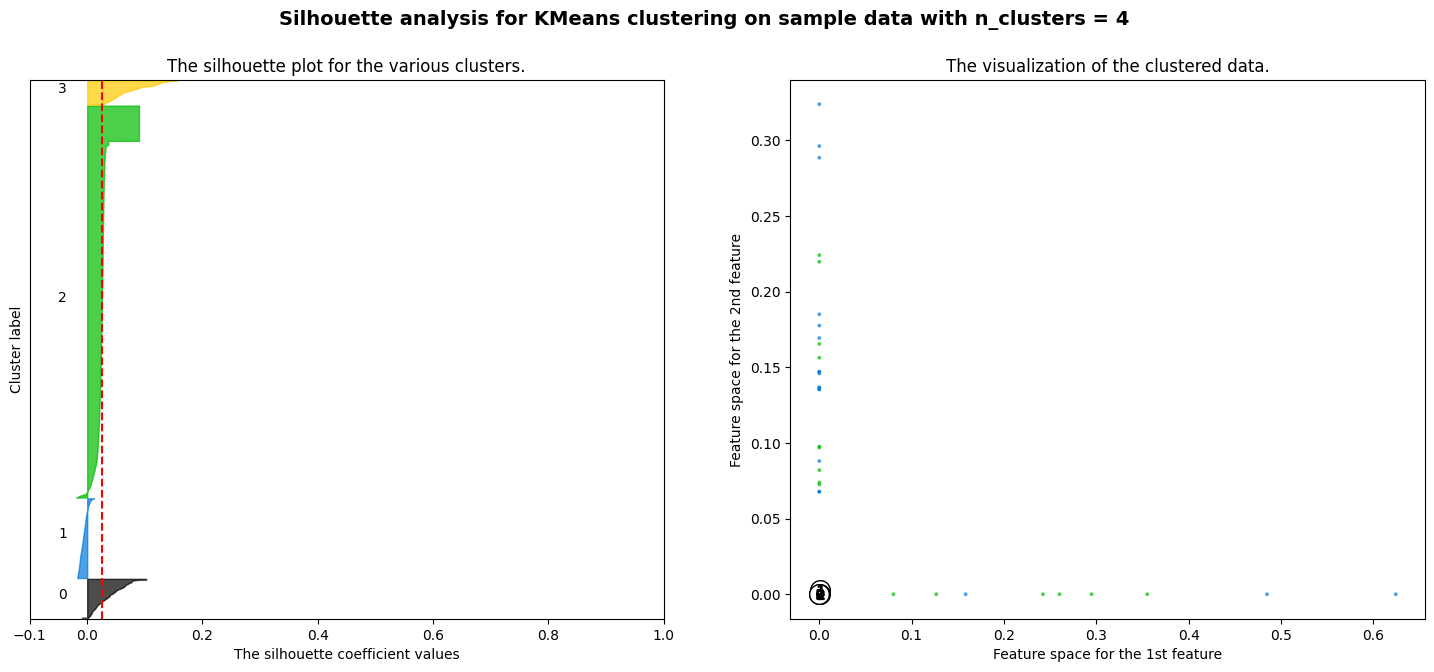

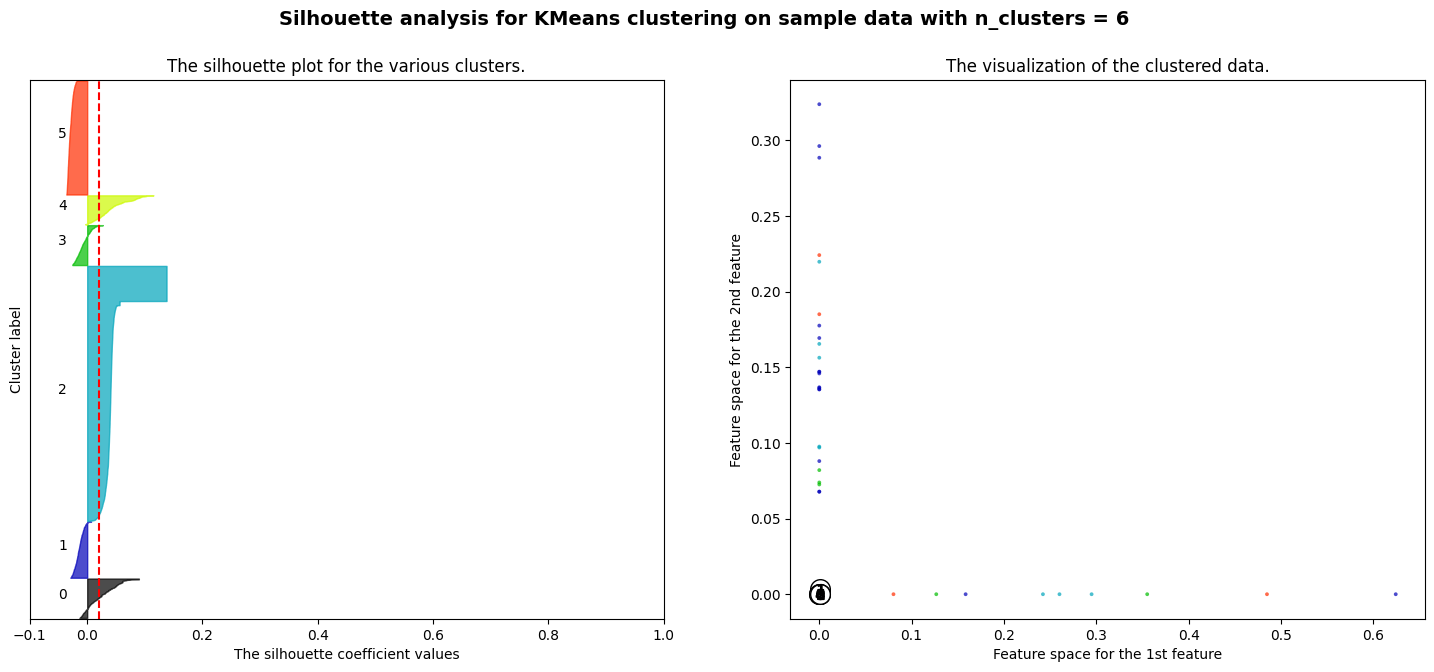

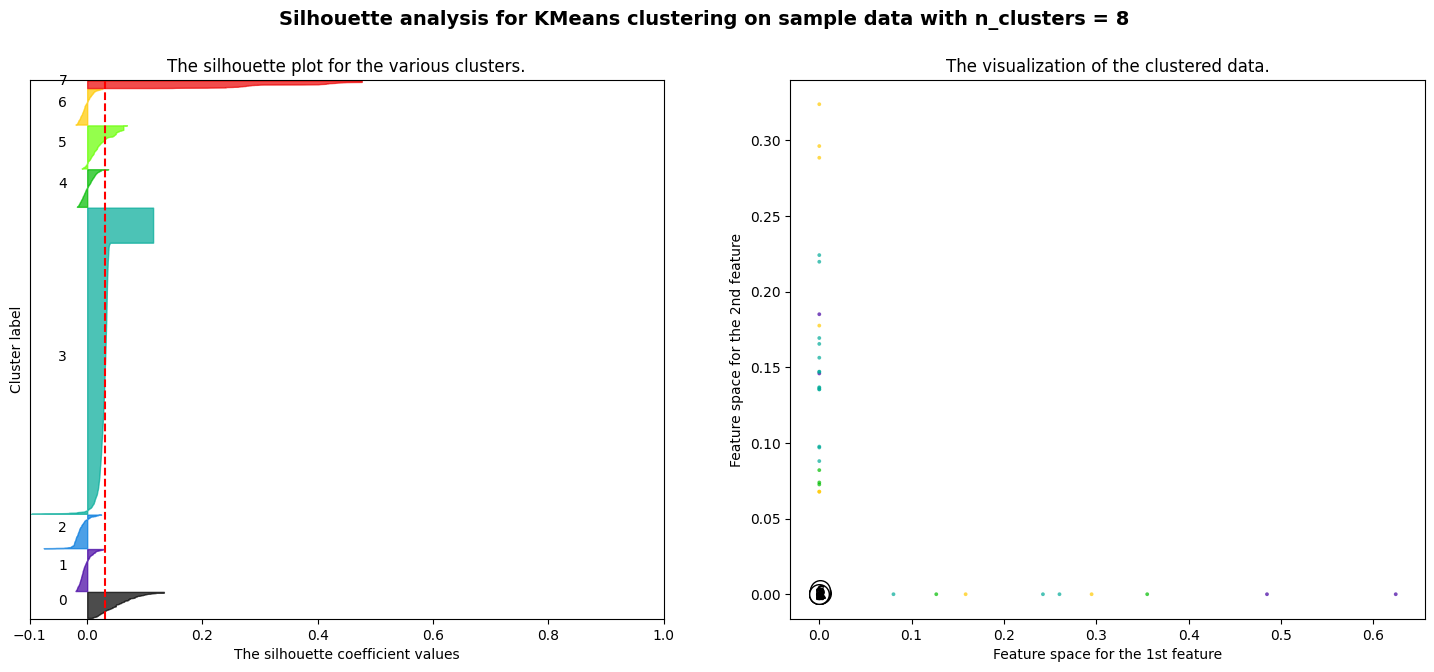

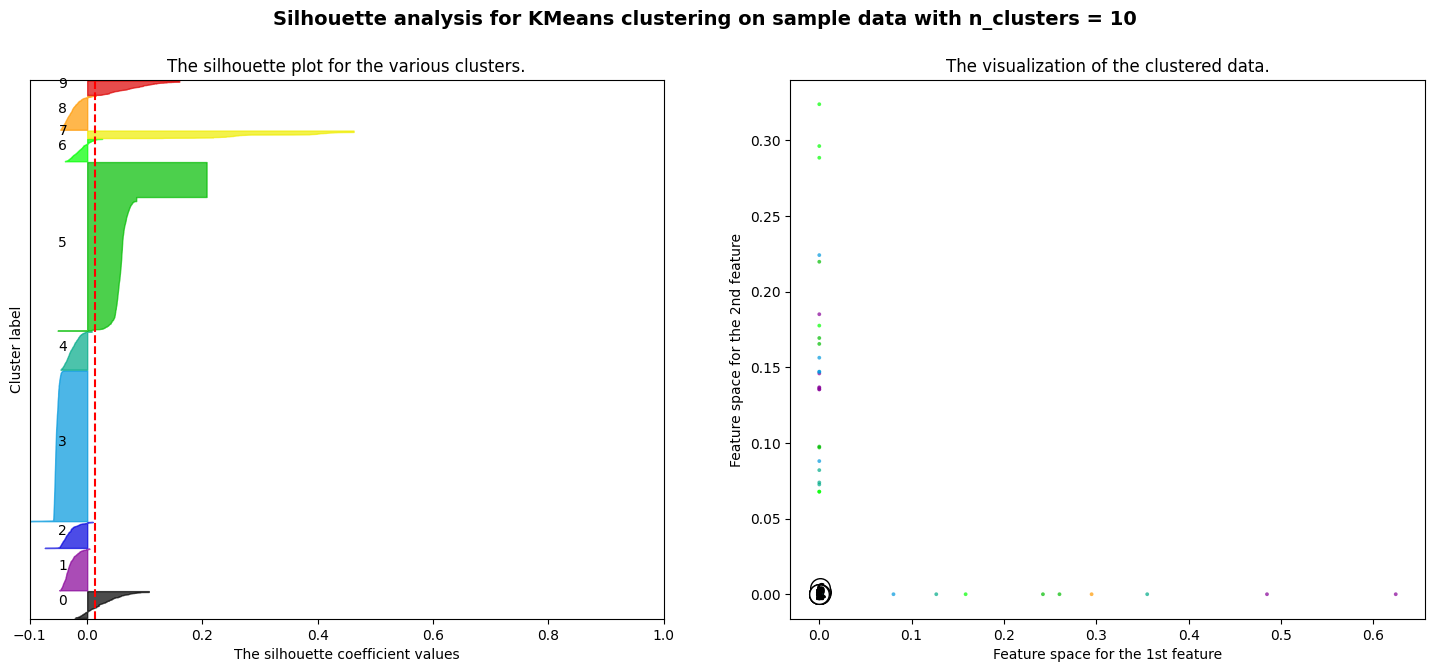

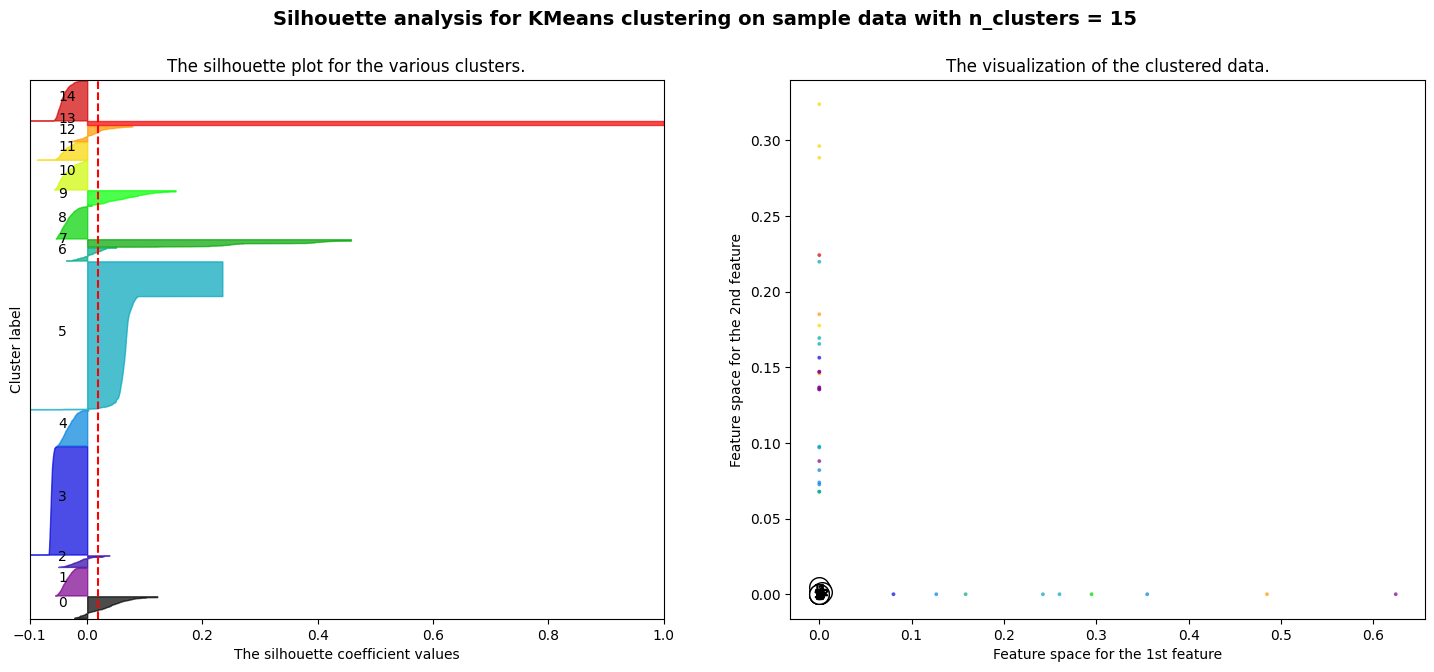

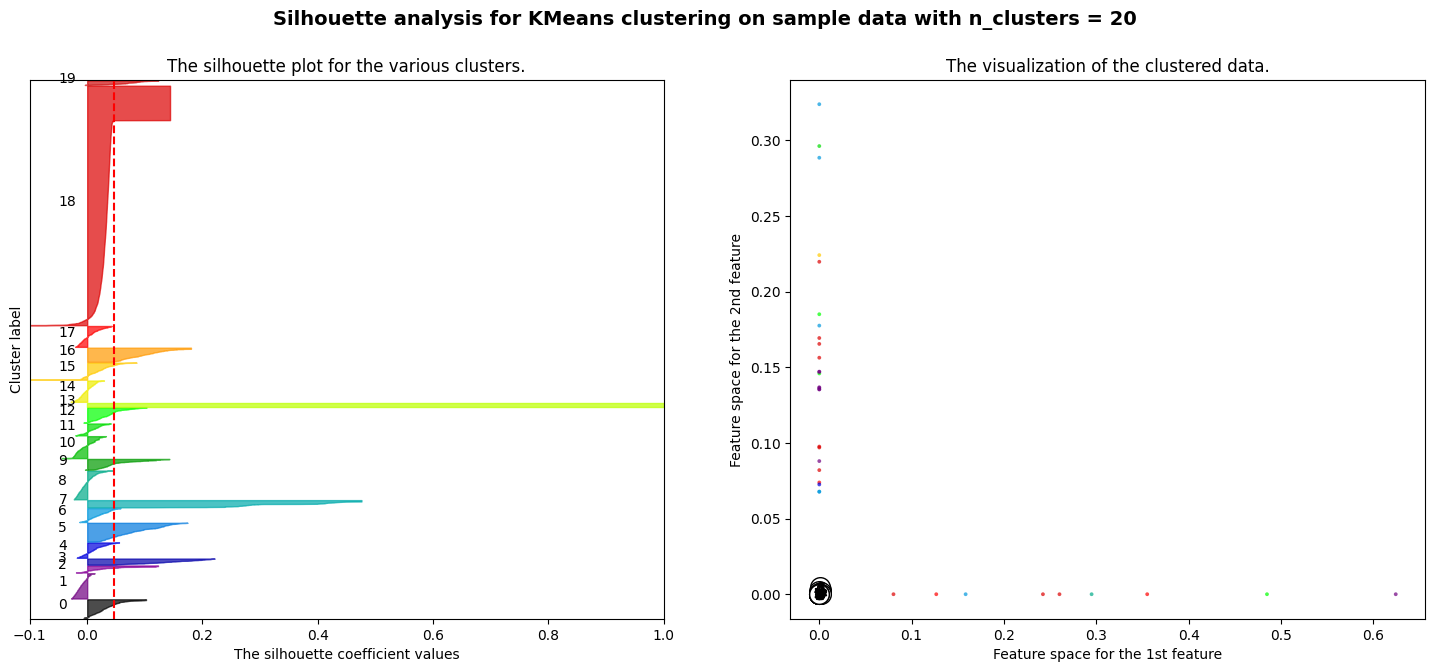

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 4, 6, 8, 10, 15, 20]

X = X_tfidf.toarray()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c= colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [46]:
X_tfidf.shape[0]

6979

In [54]:
X.toarray().shape

(6979, 6001)

In [57]:
vectorizer = TfidfVectorizer(
    max_df=0.1,
    min_df=5,
    stop_words="english",
)
X_tfidf = vectorizer.fit_transform(filtered_data.name)

For n_clusters = 20 The average silhouette_score is : 0.03975725644316796
For n_clusters = 22 The average silhouette_score is : 0.05251456220215136
For n_clusters = 24 The average silhouette_score is : 0.03839990420501976
For n_clusters = 26 The average silhouette_score is : 0.03661723363843803
For n_clusters = 28 The average silhouette_score is : 0.03578893800281932
For n_clusters = 30 The average silhouette_score is : 0.04054955552131396
For n_clusters = 35 The average silhouette_score is : 0.03895803263532808


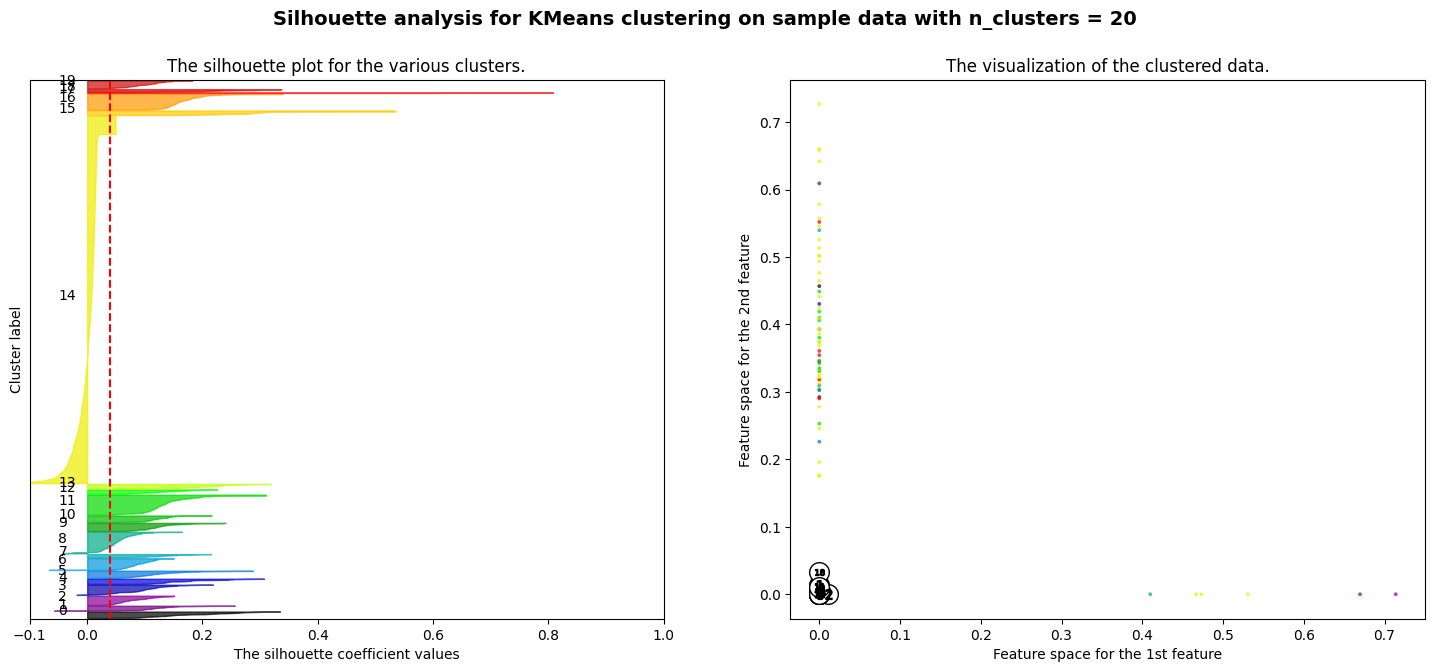

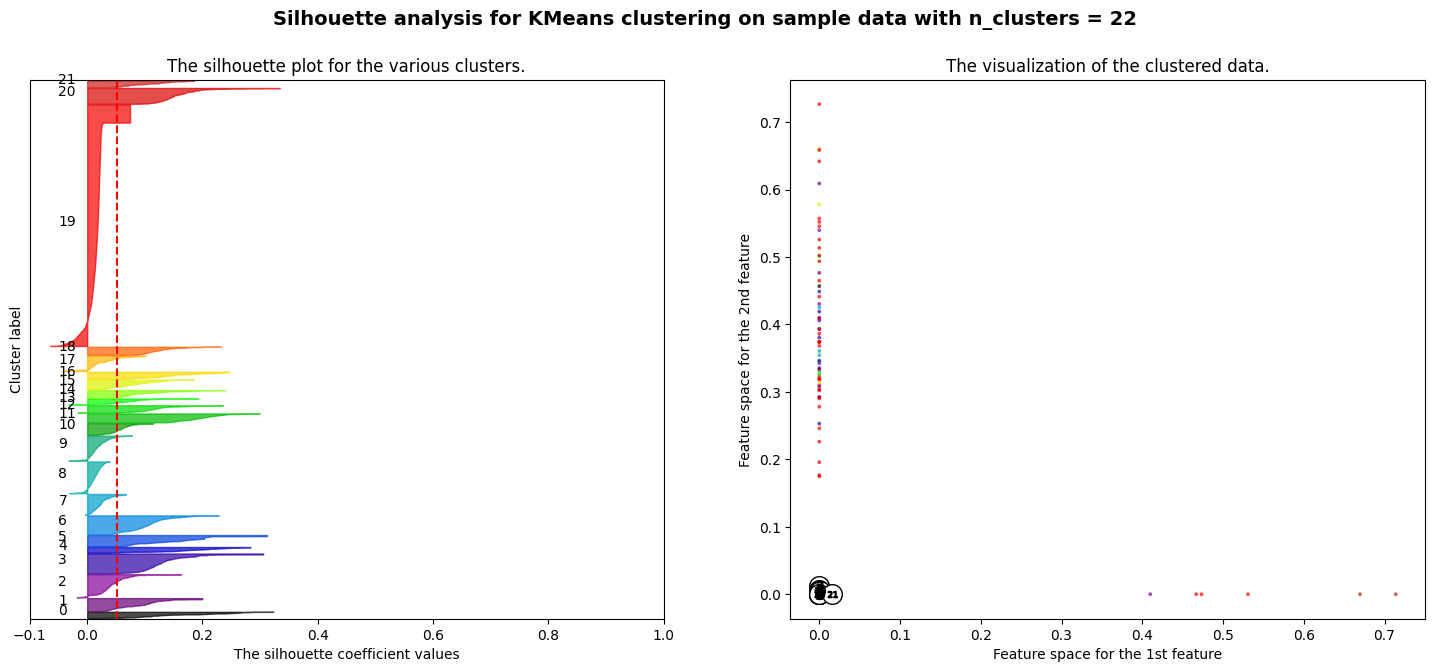

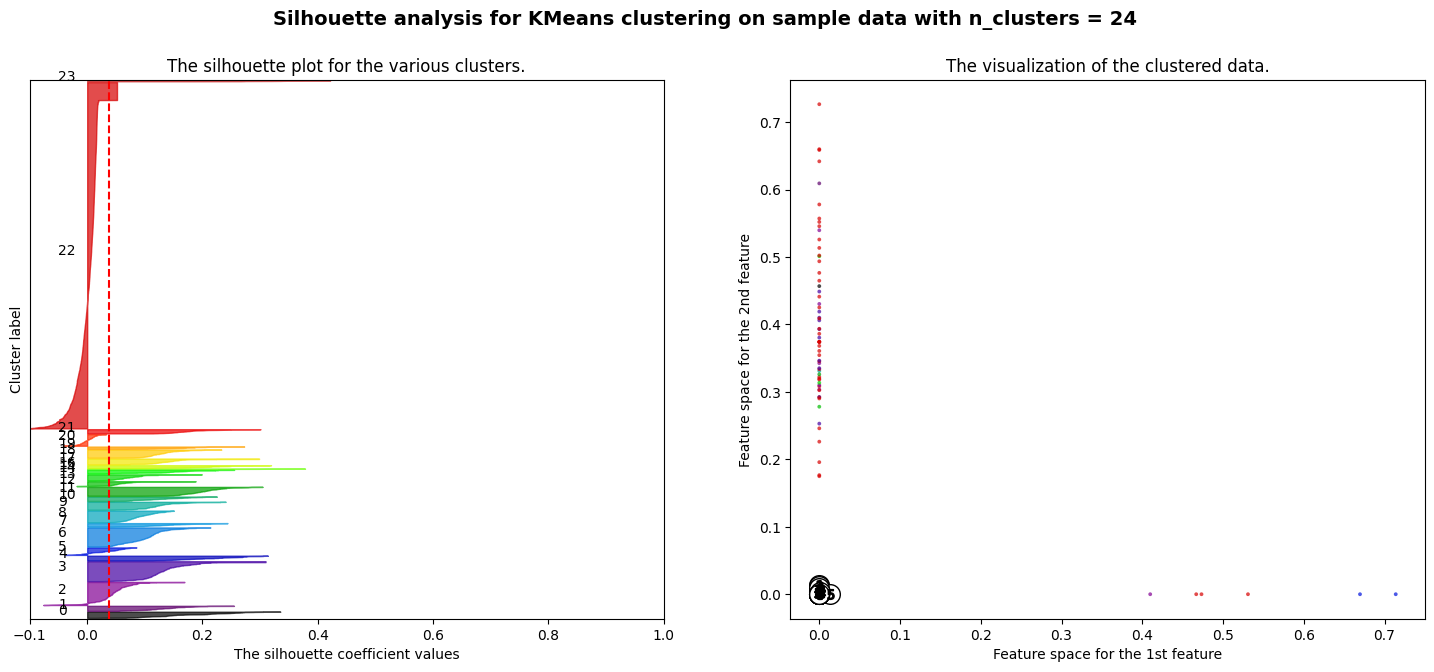

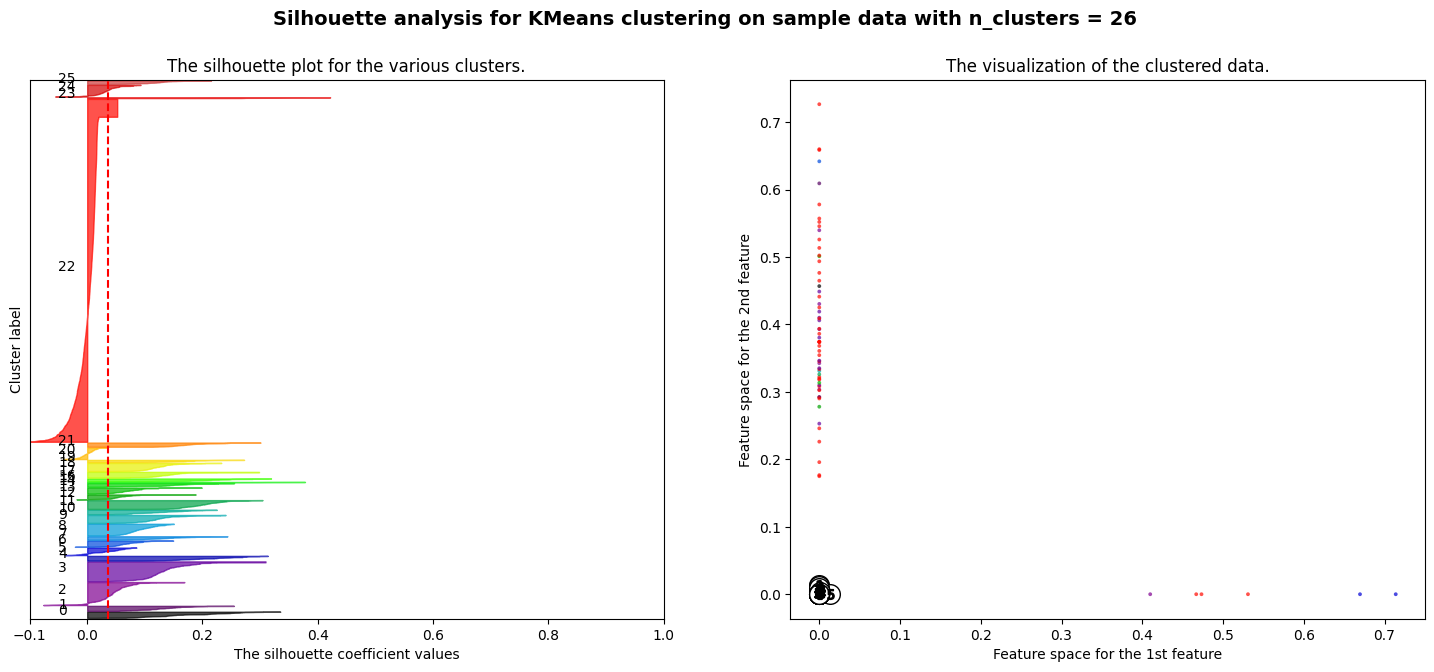

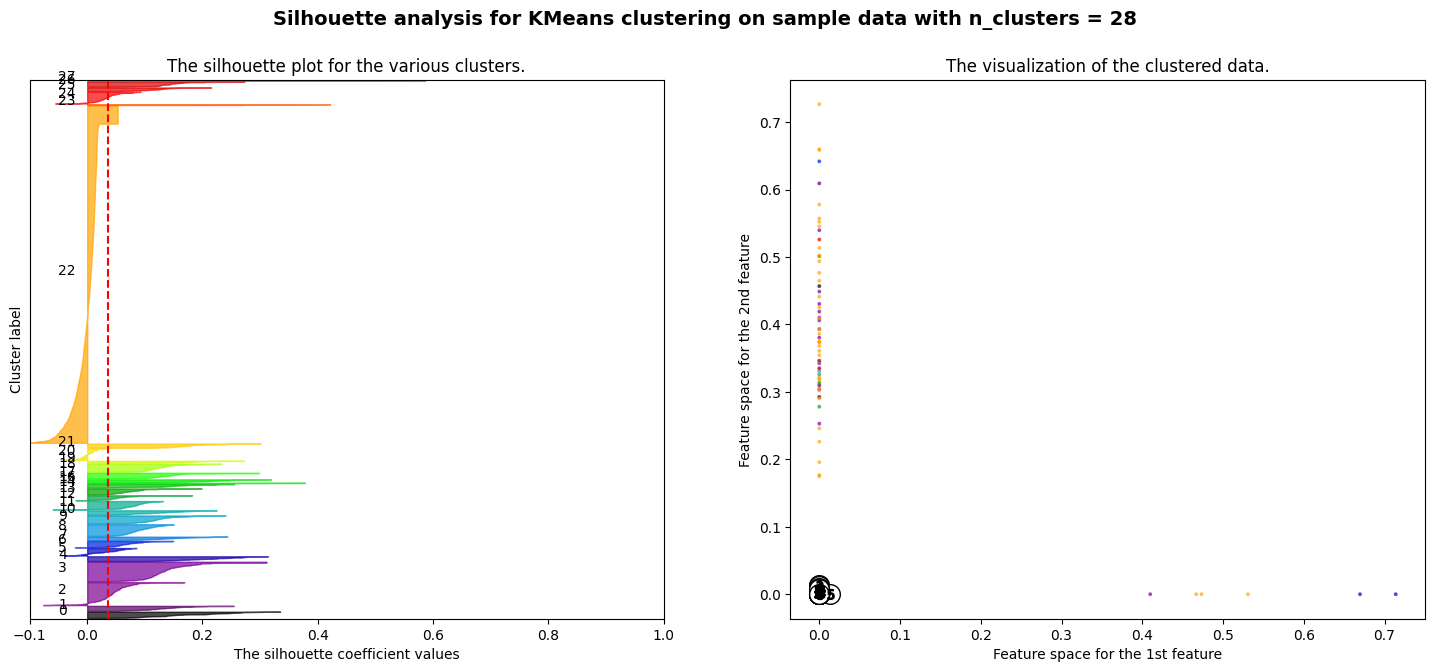

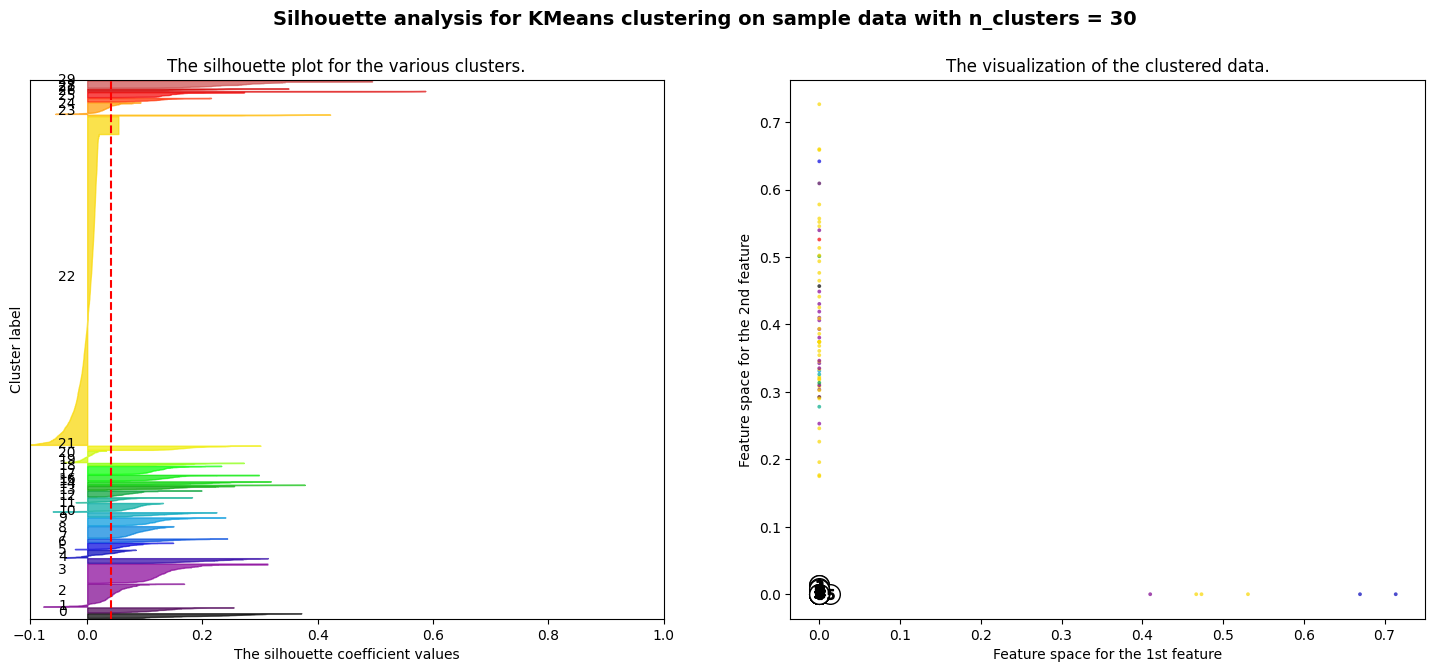

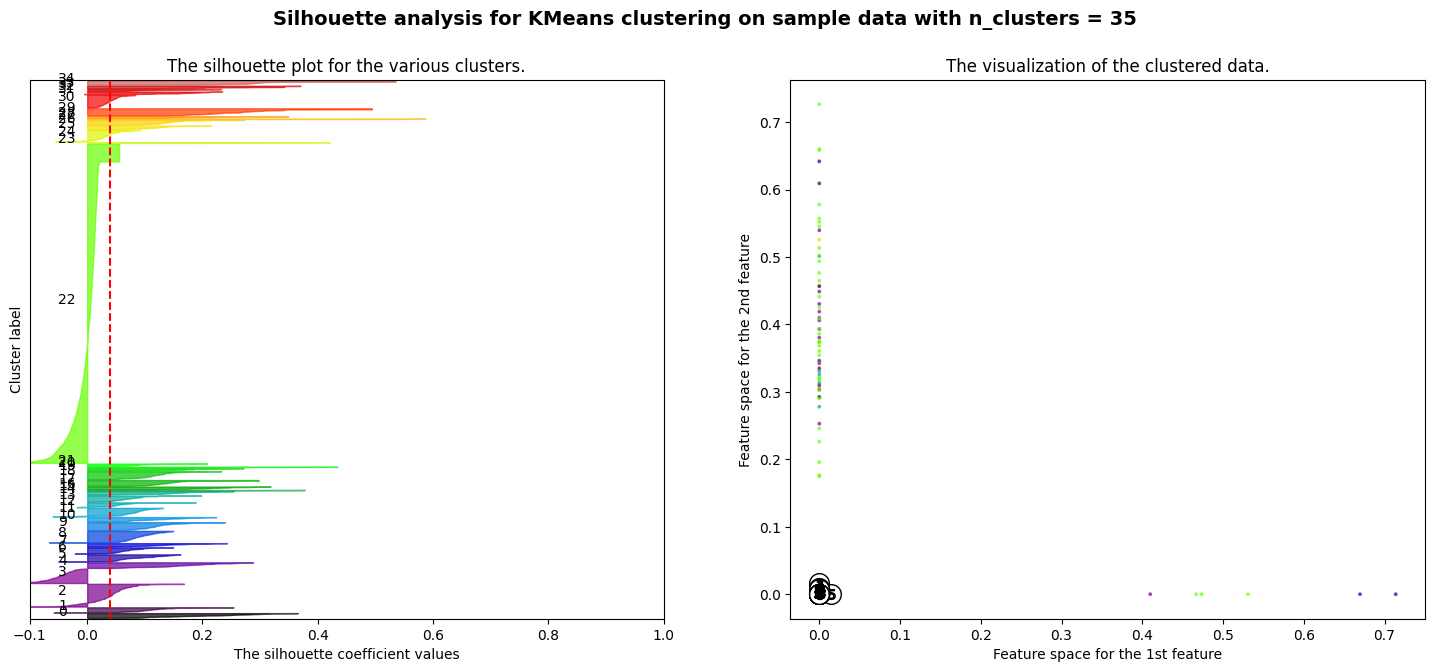

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [20, 22, 24, 26, 28, 30, 35]

X = X_tfidf.toarray()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c= colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [62]:
silhouette_samples(X, cluster_labels)

array([-0.01256754,  0.00731739,  0.0118625 , ...,  0.0164776 ,
        0.00468975,  0.0158876 ])

In [70]:
vectorizer = TfidfVectorizer(
    max_df=0.1,
    min_df=5,
    stop_words="english",
)
X_tfidf = vectorizer.fit_transform(filtered_data.name + " " + filtered_data.description)

For n_clusters = 35 The average silhouette_score is : 0.03880905734416929
For n_clusters = 40 The average silhouette_score is : 0.04513925709484851
For n_clusters = 45 The average silhouette_score is : 0.04738048954414943
For n_clusters = 50 The average silhouette_score is : 0.048154729083829506


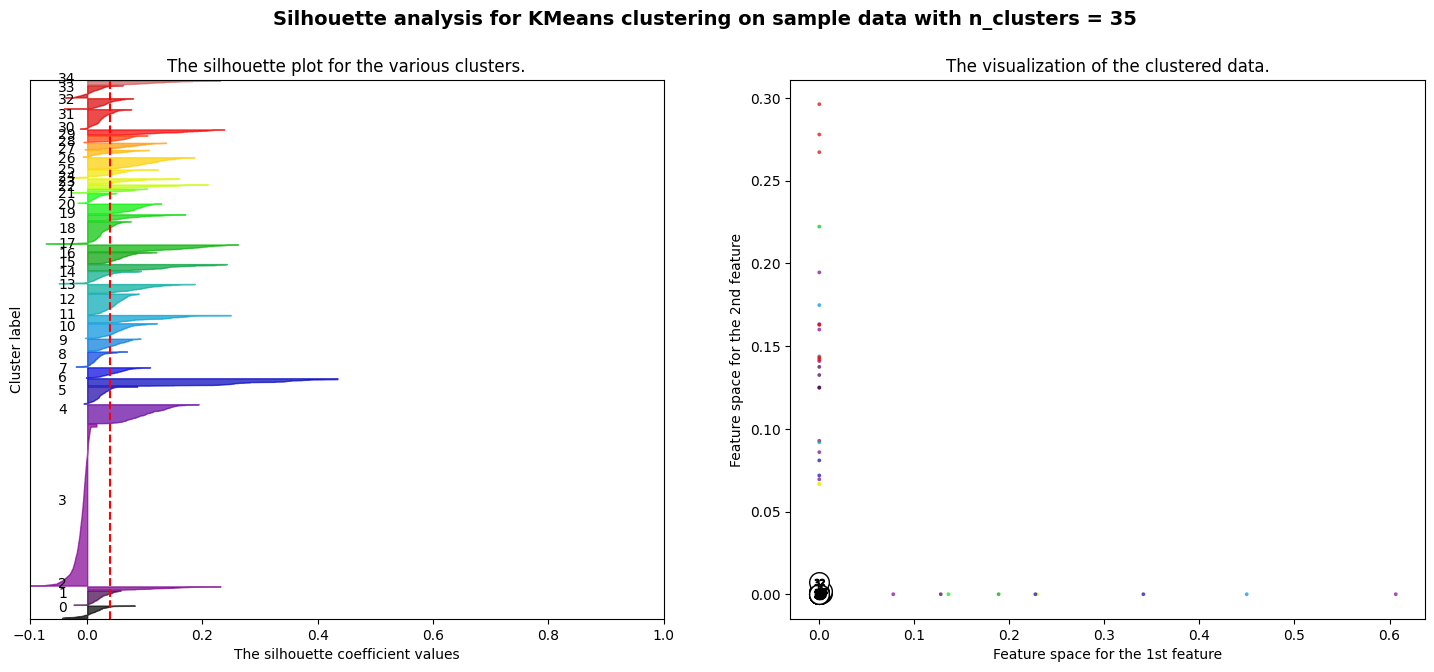

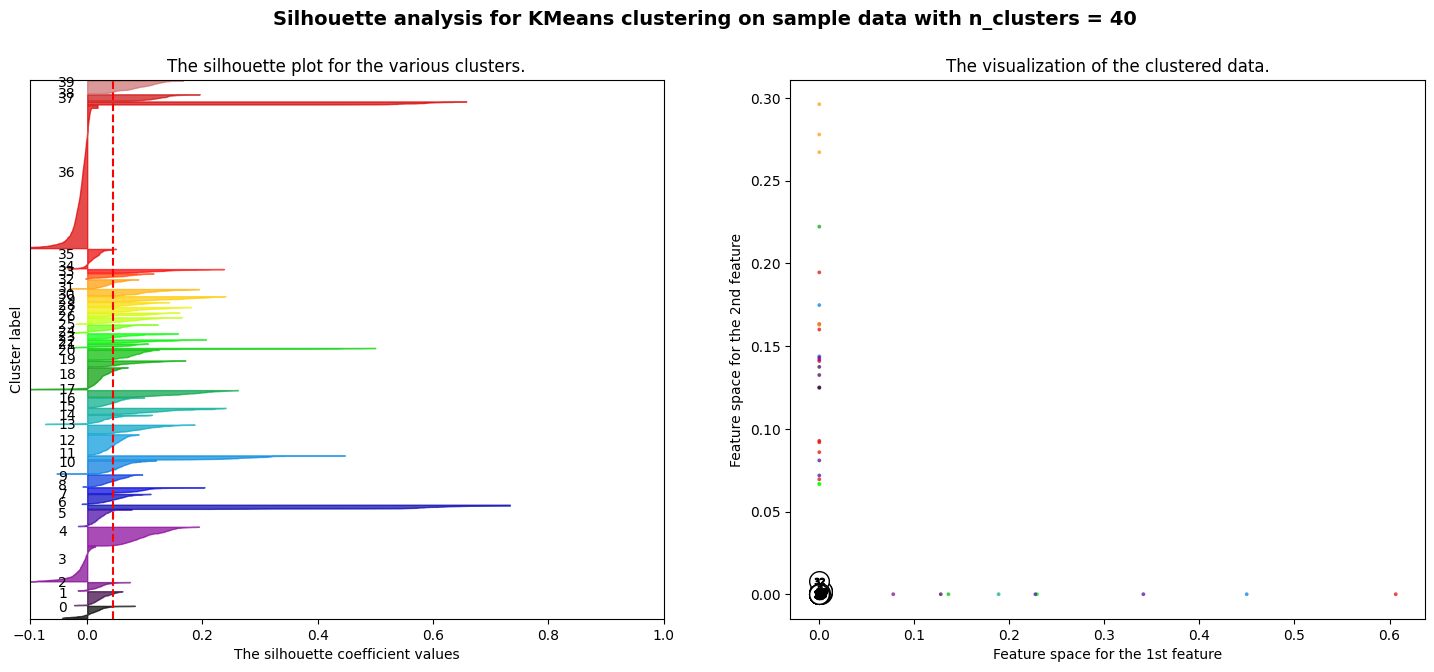

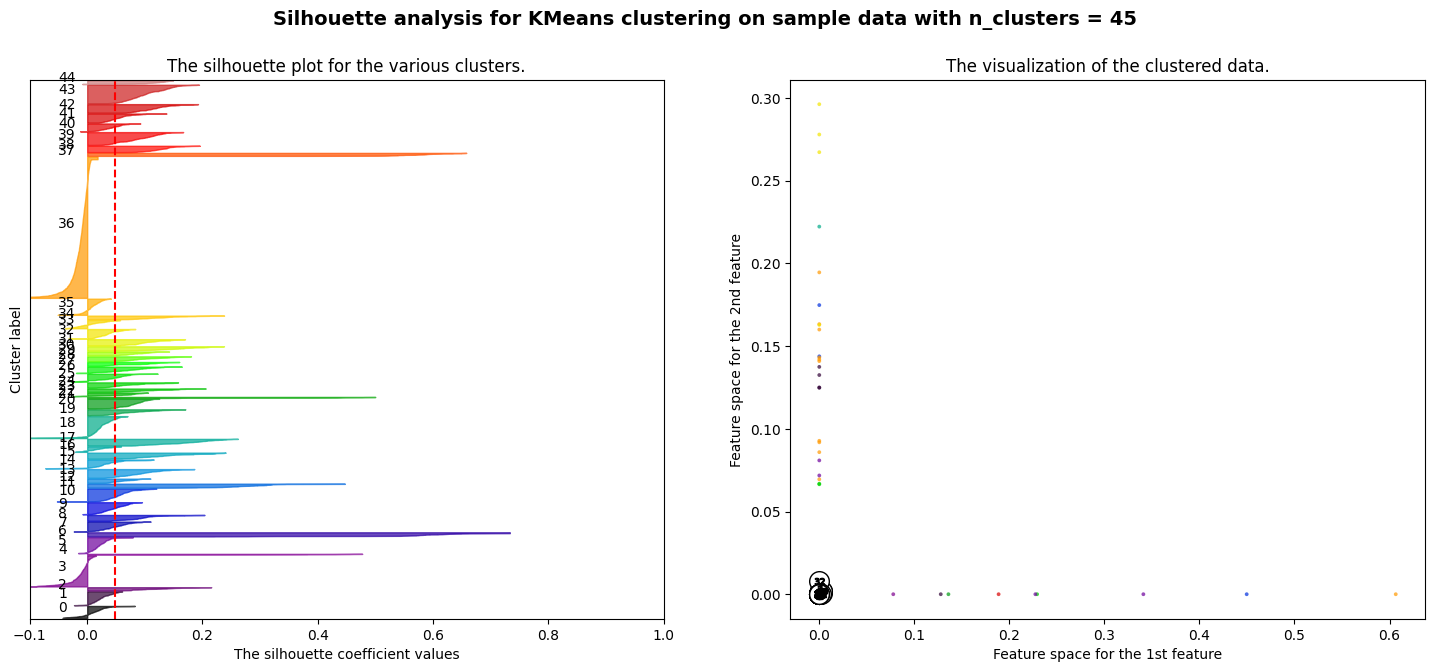

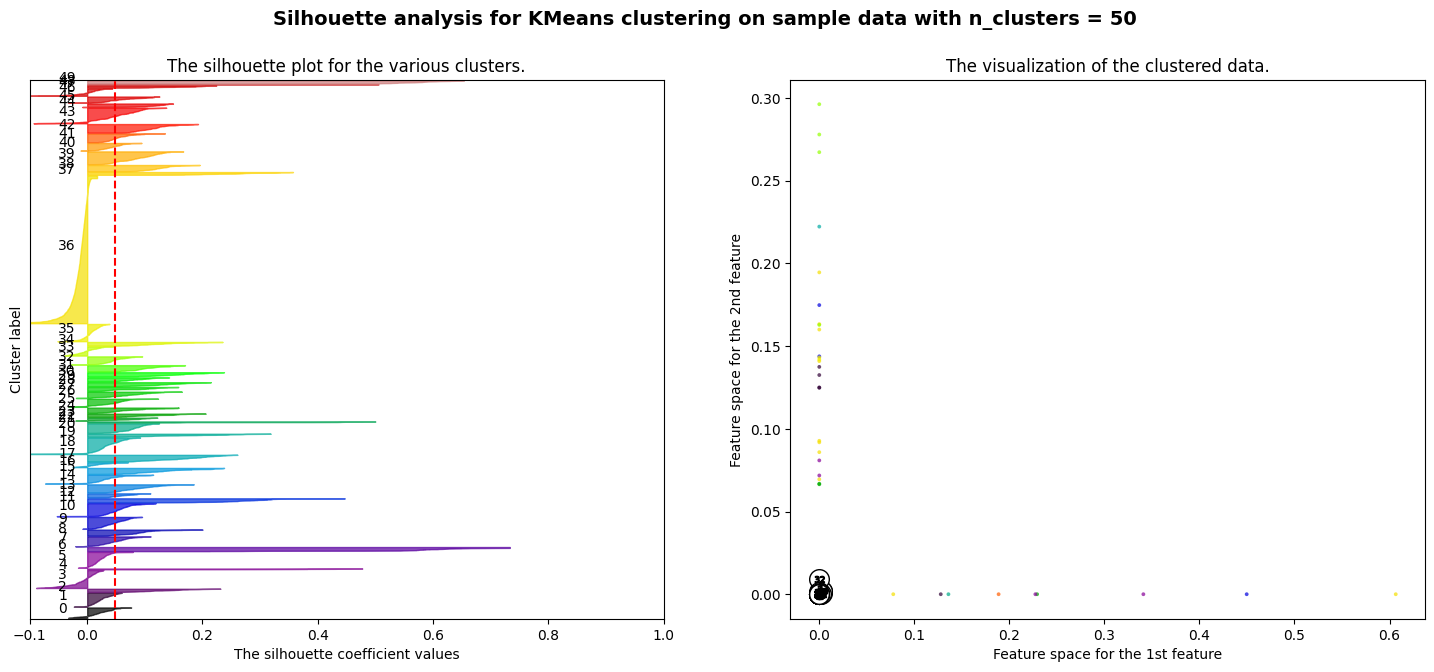

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [35, 40, 45, 50]

X = X_tfidf.toarray()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c= colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


'Desi Grub Raw White Honey | Unpasteurized Unfiltered High Himalayan Raw Honey 300 Gm'